# 2018-19 English Premier League: An Exploratory Data Analysis

- This dataset contains data of every game from the 2018-2019 season in the English Premier League. 
- In this project, I aim to explore the data and communicate some interesting findings. 
- The last section of this project shows the correlation between various columns of the data. 

[Source](https://data.world/chas/2018-2019-premier-league-matches) of dataset.

## Data Dictionary
| Column    | Explanation                                   |
| --------- | --------------------------------------------- |
| Div       | Division the game was played in               |                            
| Date      | The date the game was played                  |
| HomeTeam  | The home team                                 |
| AwayTeam  | The away team                                 |
| FTHG      | Full time home goals                          |
| FTAG      | Full time away goals                          |
| FTR       | Full time result                              |
| HTHG      | Half time home goals                          |
| HTAG      | Half time away goals                          |
| HTR       | Half time result                              |
| Referee   | The referee of the game                       |
| HS        | Number of shots taken by home team            |
| AS        | Number of shots taken by away team            |
| HST       | Number of shots taken by home team on target  |
| AST       | Number of shots taken by away team on target  |
| HF        | Number of fouls made by home team             |
| AF        | Number of fouls made by away team             |
| HC        | Number of corners taken by home team          |
| AC        | Number of corners taken by away team          |
| HY        | Number of yellow cards received by home team  |
| AY        | Number of yellow cards received by away team  |
| HR        | Number of red cards received by home team     |
| AR        | Number of red cards received by away team     |

In [ ]:
#Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset into a dataframe
df = pd.read_csv("soccer18-19.csv")

#Printing the number of rows and columns
print('Number of rows and columns:', df.shape)

#Printing out the first five rows
df.head()


Number of rows and columns: (380, 23)


,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HTR,...,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
0,E0,10/8/18,Man United,Leicester,2,1,H,1,0,H,...,6,4,11,8,2,5,2,1,0,0
1,E0,11/8/18,Bournemouth,Cardiff,2,0,H,1,0,H,...,4,1,11,9,7,4,1,1,0,0
2,E0,11/8/18,Fulham,Crystal Palace,0,2,A,0,1,A,...,6,9,9,11,5,5,1,2,0,0
3,E0,11/8/18,Huddersfield,Chelsea,0,3,A,0,2,A,...,1,4,9,8,2,5,2,1,0,0
4,E0,11/8/18,Newcastle,Tottenham,1,2,A,1,2,A,...,2,5,11,12,3,5,2,2,0,0


## Understanding Columns & Values 
- The info() function ia useful tool to summarize the data. 
- Here, I'm going to analyze each column's name, datatype and number of non-null rows they carry. 
- This is important to see if there are any missing values and to get familiar with the overall dataset. 

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 380 entries, 0 to 379
Data columns (total 23 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Div       380 non-null    object
 1   Date      380 non-null    object
 2   HomeTeam  380 non-null    object
 3   AwayTeam  380 non-null    object
 4   FTHG      380 non-null    int64 
 5   FTAG      380 non-null    int64 
 6   FTR       380 non-null    object
 7   HTHG      380 non-null    int64 
 8   HTAG      380 non-null    int64 
 9   HTR       380 non-null    object
 10  Referee   380 non-null    object
 11  HS        380 non-null    int64 
 12  AS        380 non-null    int64 
 13  HST       380 non-null    int64 
 14  AST       380 non-null    int64 
 15  HF        380 non-null    int64 
 16  AF        380 non-null    int64 
 17  HC        380 non-null    int64 
 18  AC        380 non-null    int64 
 19  HY        380 non-null    int64 
 20  AY        380 non-null    int64 
 21  HR        380 no


- Now, let's use the isna() function and aggregating it using sum() to get the total count of missing values. 

In [ ]:
df.isna().sum()

Div         0
Date        0
HomeTeam    0
AwayTeam    0
FTHG        0
FTAG        0
FTR         0
HTHG        0
HTAG        0
HTR         0
Referee     0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
dtype: int64

- The data is complete as there are no null values. 
- This means that I don't have to alter the dataframe in any way. 

## Useful Statistics
- Here, we'll be using the describe() function. 
- This gives us helpful descriptive stats for our data
- Null values are excluded here. In our case, however, there aren't any.

In [ ]:
df.describe()

,FTHG,FTAG,HTHG,HTAG,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR
count,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000,380.000000
mean,1.568421,1.252632,0.678947,0.573684,14.134211,11.144737,4.778947,3.928947,10.152632,10.305263,5.705263,4.552632,1.526316,1.684211,0.047368,0.076316
std,1.312836,1.180031,0.860802,0.766958,5.855371,4.654002,2.677686,2.283982,3.293532,3.503707,2.971718,2.730627,1.222844,1.209140,0.212706,0.275599
min,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,10.000000,8.000000,3.000000,2.000000,8.000000,8.000000,4.000000,2.750000,1.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,14.000000,11.000000,5.000000,4.000000,10.000000,10.000000,5.000000,4.000000,1.000000,2.000000,0.000000,0.000000
75%,2.000000,2.000000,1.000000,1.000000,18.000000,14.000000,6.000000,5.250000,12.000000,13.000000,8.000000,6.000000,2.000000,2.000000,0.000000,0.000000
max,6.000000,6.000000,4.000000,3.000000,36.000000,25.000000,14.000000,12.000000,23.000000,21.000000,16.000000,14.000000,6.000000,5.000000,1.000000,2.000000


- Using the unique() function to print distinct values of the 'Home Team' column. 
- This will show us all the teams that participated in the season. 

In [ ]:
df['HomeTeam'].unique()

array(['Man United', 'Bournemouth', 'Fulham', 'Huddersfield', 'Newcastle',
       'Watford', 'Wolves', 'Arsenal', 'Liverpool', 'Southampton',
       'Cardiff', 'Chelsea', 'Everton', 'Leicester', 'Tottenham',
       'West Ham', 'Brighton', 'Burnley', 'Man City', 'Crystal Palace'],
      dtype=object)

- Using the value_counts() function to print out the number of rows for each unique team.
- This shows how many matches each team played as Home Team. 
- Note: Every team playes 19 matches as Home Team and other 19 as Away.

In [ ]:
df['HomeTeam'].value_counts(dropna=True)

Chelsea           19
Bournemouth       19
Burnley           19
Liverpool         19
Tottenham         19
Everton           19
West Ham          19
Newcastle         19
Cardiff           19
Crystal Palace    19
Huddersfield      19
Wolves            19
Fulham            19
Leicester         19
Man City          19
Man United        19
Southampton       19
Arsenal           19
Watford           19
Brighton          19
Name: HomeTeam, dtype: int64

# Data Visualizations

## Speculating Outliers

<AxesSubplot:>

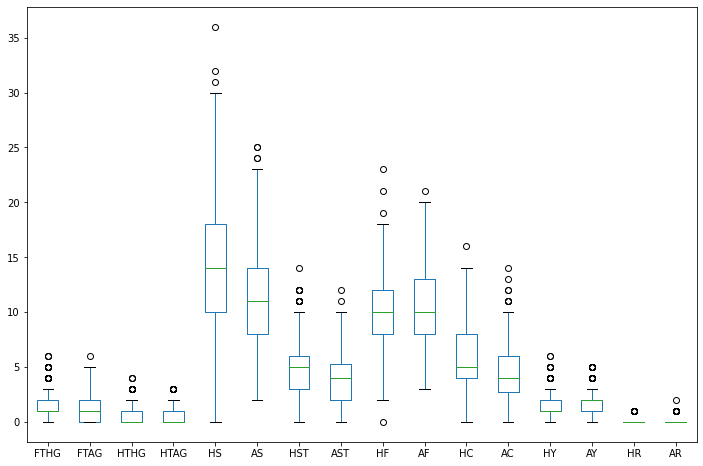

In [ ]:
# Plotting a boxplot to figure out some outliers. 
df.plot(
	kind='box', figsize=(12,8) 
)

- Largest distribution of data is of 'Hometeam shots'. 
- Every category has outliers. However, the largest amount of outliers for 'AC' (corners taken by the away team).
- Also, there are significant outliers for 'HY'. This means that were matches with an oddly large amouont of yellow cards.  

## Checking the Distribution

Let's use a histogram to further analyze one column in the df.
- Plotting the distribution of full-time home and away goals.

<AxesSubplot:ylabel='Frequency'>

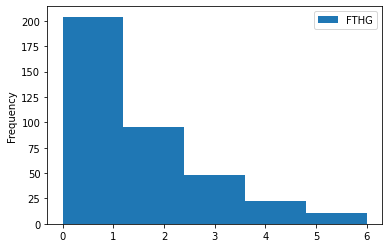

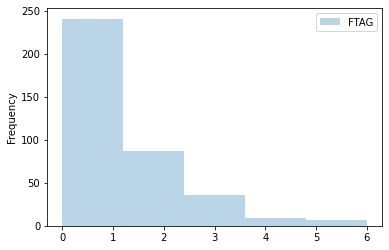

In [ ]:
#Home Goals
df.plot(
	kind = "hist",
    y = 'FTHG',
    bins = 5,
    # figsize = (12,8)
)

#Away Goals
df.plot(
	kind = "hist",
    y = 'FTAG',
    bins = 5,
    alpha = 0.3,
    # figsize = (12,8)
)

- Distribution of home and away goals is similar. 
- However, the frequency of away goals seems to be higher in the 0 - 1 range. 

## Comparing Averages

- Now, we will use a bar plot to compare averages of a numeric column across a categorical columns. 
- So, in our case, let's calculate the avg home goals scored by teams when they were playing at their home stadium. 

<AxesSubplot:title={'center':'Average Home Goals Scored by Home Teams'}, xlabel='Home Team', ylabel='Home goals scored'>

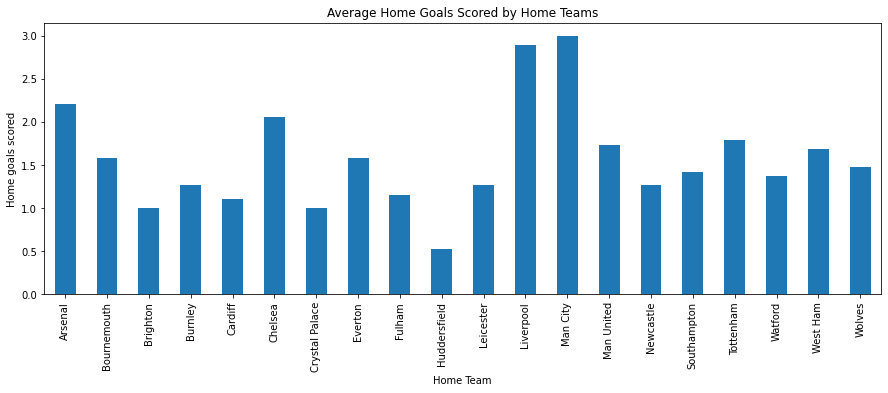

In [ ]:
#Grouping by HomeTeam
df_bar = df.groupby(["HomeTeam"])["FTHG"].mean()

#Bar Plot
df_bar.plot(
	kind='bar',
    ylabel='Home goals scored',
    xlabel = 'Home Team',
    title = 'Average Home Goals Scored by Home Teams',
    figsize=(15,5)
)

- Liverpool & Manchester City have the highest average number of home goals scored as home teams. 
- What about the most amount away goals scored by away teams?

<AxesSubplot:title={'center':'Average Away Goals Scored by Away Teams'}, xlabel='Away Team', ylabel='Away goals scored'>

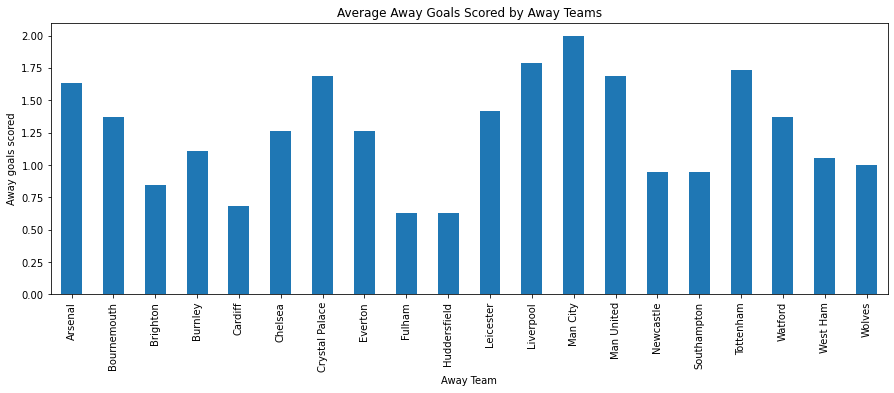

In [ ]:
#Grouping by Away Team
df_bar = df.groupby(["AwayTeam"])['FTAG'].mean()

#Bar Plot
df_bar.plot(
		kind='bar',
    	ylabel='Away goals scored',
    	xlabel = 'Away Team',
        title = 'Average Away Goals Scored by Away Teams',
	   	figsize=(15,5)
)

- Looks like Manchester City had the highest average number of away goals scored as away team as well.
- Followed by Liverpool, Man united, Tottenham and Crystal Palace

- Let's use a linie plot to find patterns such as seasonality.

<AxesSubplot:title={'center':'Number of Matches vs. Days of Week'}, xlabel='Days of the Week', ylabel='Count of Matches'>

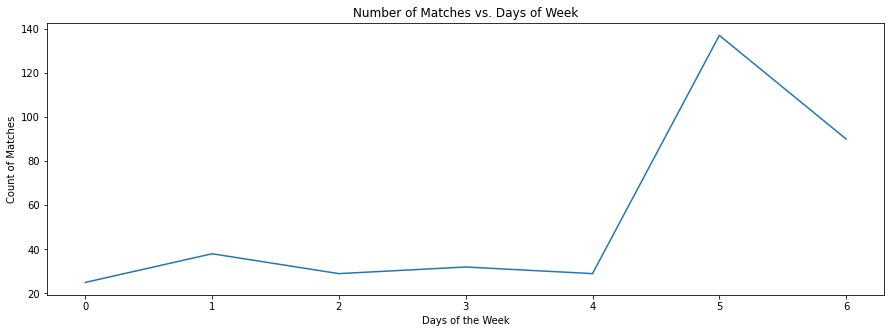

In [ ]:
# Convert any date and/or time column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Create a new DataFrame, group by the datetime column and choose an aggregation
# On the datetime column, choose a time object, options can be found here:
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components
df_dates = df['Date'].groupby([df['Date'].dt.dayofweek]).count()

df_dates.plot(
    kind="line",  # Specifies line plot
    ylabel="Count of Matches",  # Add a y-axis label
    xlabel="Days of the Week",  # Add a x-axis label 
    title ="Number of Matches vs. Days of Week",
    figsize=(15, 5)  # Set width & height in inches
)

- As expected, most of the matches happened on the weekend. 

- Is there a relationshiip between number of Number of shots taken by home team on target and the number of goals scored?
- Let's use a scatter plot to find out. 

## Exploring Relationships between Variables

- Let's see if there's a relationship betweem fouls made and yellow card bookings.
- Let's use a scatter plot to analyze the relationship.

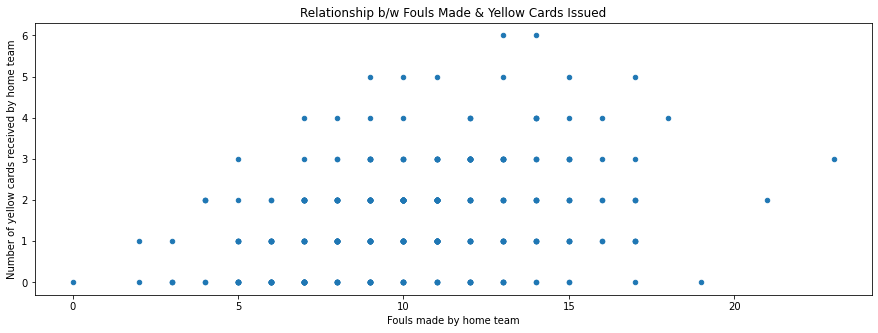

In [ ]:
df.plot(
    kind="scatter",  # Specifies a scatter plot
    x="HF",  # Fouls made by hometeam
    y="HY",  # Yellow card bookings for Home Team
    xlabel="Fouls made by home team",
    ylabel ="Number of yellow cards received by home team",
    title="Relationship b/w Fouls Made & Yellow Cards Issued",
    figsize=(15, 5)  # Set width & height in inches
);

- As expected, there seems to be a positive relationship between the two variables. 
- More number of fouls does lead to more number of warnings or yellow cards. 
- However, in some circumstances, the referees do overlook various boookabale offence.

## Plotting out the Correlation

- To further explore relationships between columns, generate a correlation matrix using pandas' corr() function and a plot it with Seaborn's heatmap() function.
- Here, we will analyze which factores contribute more to home and away team's goals.

In [ ]:
#Filtering the main dataframe 
df_2 = df.filter(items = ["FTHG", "FTAG", "HTS", "HS", "AS", "HC", "AC"])

#printing out the filtered dataframe's sample
df_2.head()

,FTHG,FTAG,HS,AS,HC,AC
0,2,1,8,13,2,5
1,2,0,12,10,7,4
2,0,2,15,10,5,5
3,0,3,6,13,2,5
4,1,2,15,15,3,5


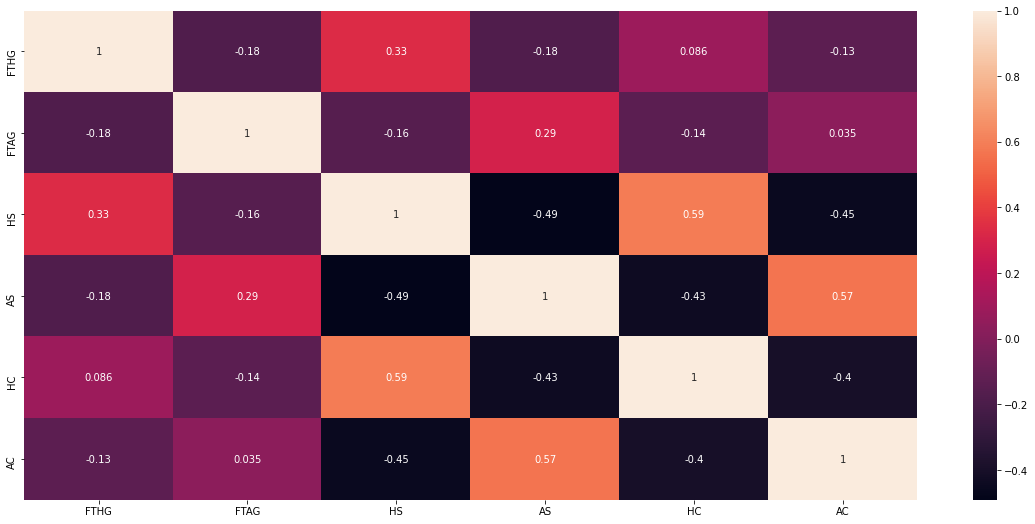

In [ ]:
# Generate and print pairwise correlation of columns
cm = df_2.corr()
# print(cm)

# Plot the correlation matrix nicely using Seaborn
plt.figure(figsize = (20,9))
sns.heatmap(cm, annot=True, )
plt.show()

- As expected, positive correlations exist between the goals scored by home team and the number of shaots they took.
- Moreover, there is a positive correlation between goals scored and number of corners taken. In other words, the team, who gets more corners increases its chances of scoring a goal. 
- The same is true for the away team as well. 